In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Load the CSV file, skipping the first two rows
file_path = r'd:\Week11\data\TSLA_data.csv'

try:
    # Read the CSV file, skipping unnecessary rows
    data = pd.read_csv(file_path, skiprows=2)

    # Rename the columns correctly
    data.columns = ['Date', 'Price', 'Adj Close', 'Close', 'High', 'Low', 'Open']

    # Convert the 'Date' column to datetime and set it as the index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    # Display the cleaned data and data types
    print(data.head())
    print("\nData types:\n", data.dtypes)
    
    # Extract the 'Close' prices
    close_prices = data['Close']
    print("\nClose prices:\n", close_prices.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

                               Price  Adj Close      Close       High  \
Date                                                                    
2015-01-02 00:00:00+00:00  14.620667  14.620667  14.883333  14.217333   
2015-01-05 00:00:00+00:00  14.006000  14.006000  14.433333  13.810667   
2015-01-06 00:00:00+00:00  14.085333  14.085333  14.280000  13.614000   
2015-01-07 00:00:00+00:00  14.063333  14.063333  14.318667  13.985333   
2015-01-08 00:00:00+00:00  14.041333  14.041333  14.253333  14.000667   

                                 Low      Open  
Date                                            
2015-01-02 00:00:00+00:00  14.858000  71466000  
2015-01-05 00:00:00+00:00  14.303333  80527500  
2015-01-06 00:00:00+00:00  14.004000  93928500  
2015-01-07 00:00:00+00:00  14.223333  44526000  
2015-01-08 00:00:00+00:00  14.187333  51637500  

Data types:
 Price        float64
Adj Close    float64
Close        float64
High         float64
Low          float64
Open           int64
dtype

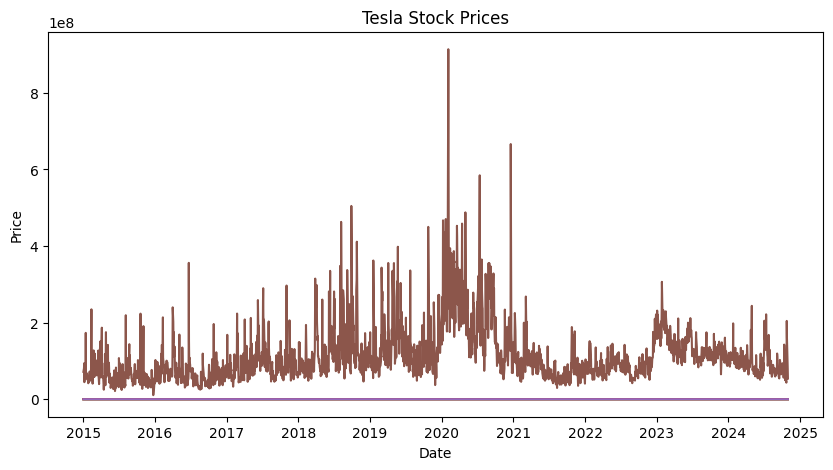

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data)
plt.title('Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

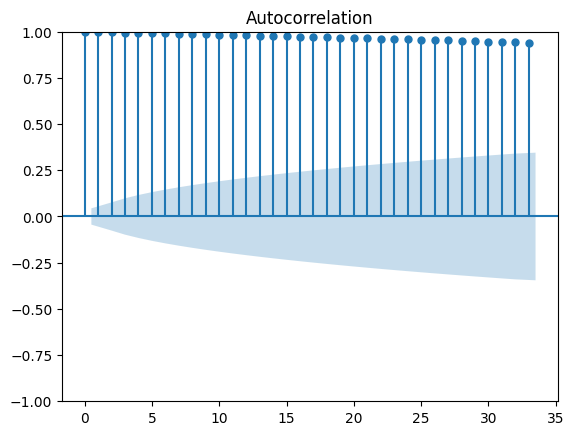

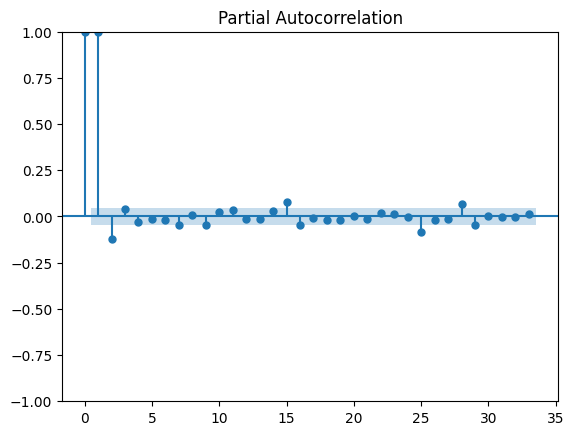

In [ ]:
train = train['Close']  # Extract the 'Close' column as a Series

plot_acf(train)
plot_pacf(train)
plt.show()

 ARIMA/SARIMA

In [ ]:
# Assuming 'train' is your time series data
train = train.asfreq('D')  # Resample to daily frequency

model = ARIMA(train, order=(3, 0, 0), freq='D')
model_fit = model.fit()
model = ARIMA(train, order=(3, 0, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2869
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -5886.153
Date:                Wed, 13 Nov 2024   AIC                          11782.306
Time:                        12:05:51   BIC                          11812.115
Sample:                    01-02-2015   HQIC                         11793.053
                         - 11-09-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.3229    130.608      0.684      0.494    -166.664     345.310
ar.L1          1.1607      0.012     97.794      0.000       1.137       1.184
ar.L2         -0.2429      0.019    -12.618      0.0

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1,1))

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

NameError: name 'data' is not defined

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, batch_size=32)

NameError: name 'Sequential' is not defined